## Predictive Analytics using Machine Learning

##### EX: 1.1

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
#downloading cover type dataset
from sklearn.datasets import fetch_covtype
data_bunch = fetch_covtype(download_if_missing=True)

##### EX: 1.2

In [3]:
#converting into DATAFRAME with column names
col=['Elevation','Aspect','Slope','Horizontal_distance_to_hydrology','Vertical_distance_to_hydrology','Horizontal_distance_to_roadways','Hillshade_9am','Hillshade_noon','Hillshade_3pm','Horizontal_distance_to_fire_points','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4','Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30','Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']
data= pd.DataFrame(data_bunch.data,columns=col)
data

,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire_points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#separating categorical and numerical values
numerical=[]
categorical=[]
for column in data.columns:                
    if data[column].nunique() < 5:       
        categorical.append(column)
    else:
        numerical.append(column)

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, numerical]
print(tabulate({"CATEGORICAL":categorical,
                "CONTINUOUS": numerical}, headers = ["CATEGORICAL", "NUMERICAL/CONTINUOUS"]))

CATEGORICAL        NUMERICAL/CONTINUOUS
-----------------  ----------------------------------
Wilderness_Area_1  Elevation
Wilderness_Area_2  Aspect
Wilderness_Area_3  Slope
Wilderness_Area_4  Horizontal_distance_to_hydrology
Soil_Type_1        Vertical_distance_to_hydrology
Soil_Type_2        Horizontal_distance_to_roadways
Soil_Type_3        Hillshade_9am
Soil_Type_4        Hillshade_noon
Soil_Type_5        Hillshade_3pm
Soil_Type_6        Horizontal_distance_to_fire_points
Soil_Type_7
Soil_Type_8
Soil_Type_9
Soil_Type_10
Soil_Type_11
Soil_Type_12
Soil_Type_13
Soil_Type_14
Soil_Type_15
Soil_Type_16
Soil_Type_17
Soil_Type_18
Soil_Type_19
Soil_Type_20
Soil_Type_21
Soil_Type_22
Soil_Type_23
Soil_Type_24
Soil_Type_25
Soil_Type_26
Soil_Type_27
Soil_Type_28
Soil_Type_29
Soil_Type_30
Soil_Type_31
Soil_Type_32
Soil_Type_33
Soil_Type_34
Soil_Type_35
Soil_Type_36
Soil_Type_37
Soil_Type_38
Soil_Type_39
Soil_Type_40


##### EX: 1.3

In [5]:
#summarizing statistics
statistics=[]
column=['COLUMN','MEAN','MEDIAN','MODE']
for i in numerical:
    statistics.append([i,np.mean(data[i]),np.median(data[i]),st.mode(data[i])])
df=pd.DataFrame(statistics,columns=column)
df.style.hide_index()

COLUMN,MEAN,MEDIAN,MODE
Elevation,2959.365301,2996.000000,2968.000000
Aspect,155.656807,127.000000,45.000000
Slope,14.103704,13.000000,11.000000
Horizontal_distance_to_hydrology,269.428217,218.000000,30.000000
Vertical_distance_to_hydrology,46.418855,30.000000,0.000000
Horizontal_distance_to_roadways,2350.146611,1997.000000,150.000000
Hillshade_9am,212.146049,218.000000,226.000000
Hillshade_noon,223.318716,226.000000,228.000000
Hillshade_3pm,142.528263,143.000000,143.000000
Horizontal_distance_to_fire_points,1980.291226,1710.000000,618.000000


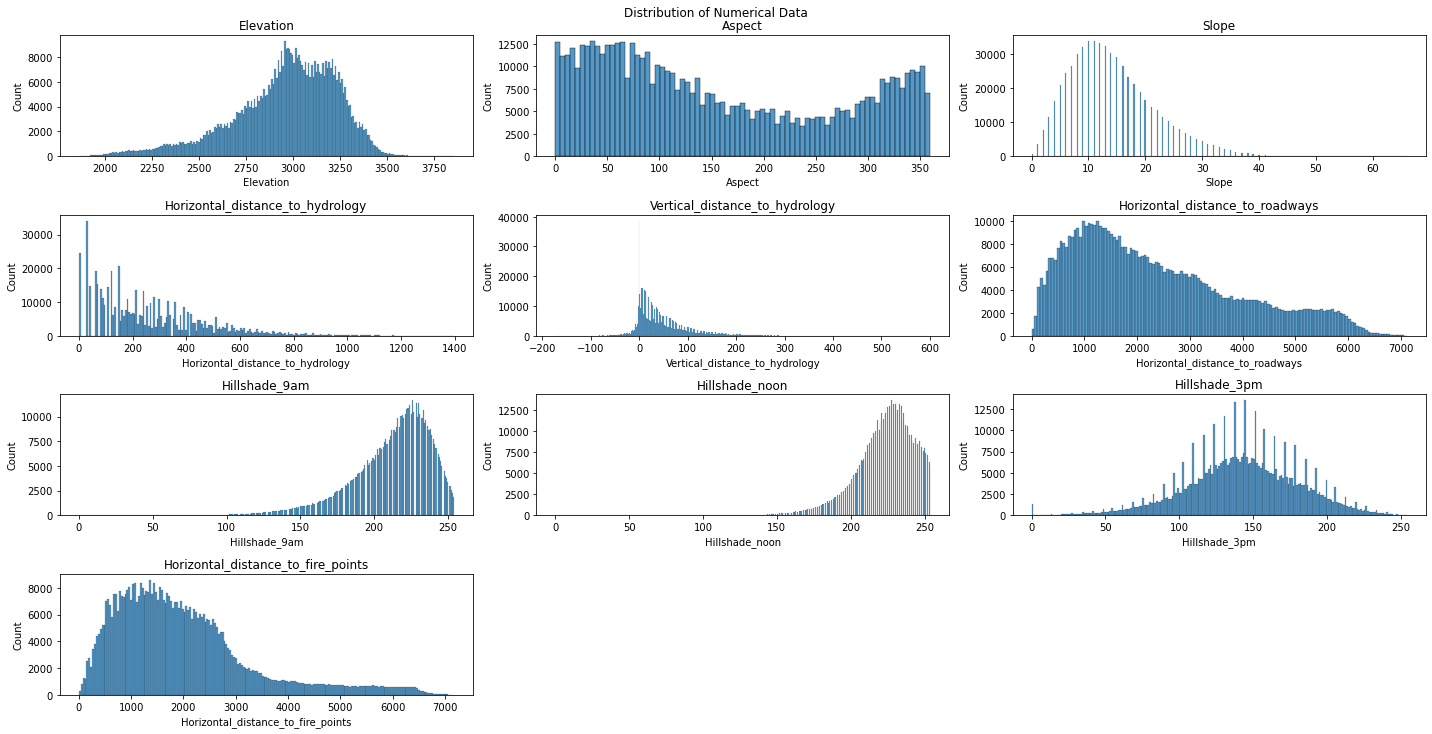

In [6]:
#graphical presentation
n=list(enumerate(numerical))
plt.figure(figsize=(20,15))
for i in n:
    plt.subplot(int(len(n)/2)+1,3,i[0]+1)
    sns.histplot(x=i[1],data=data,palette='rainbow')
    plt.title(i[1])
plt.suptitle('Distribution of Numerical Data')
plt.tight_layout()
plt.show()

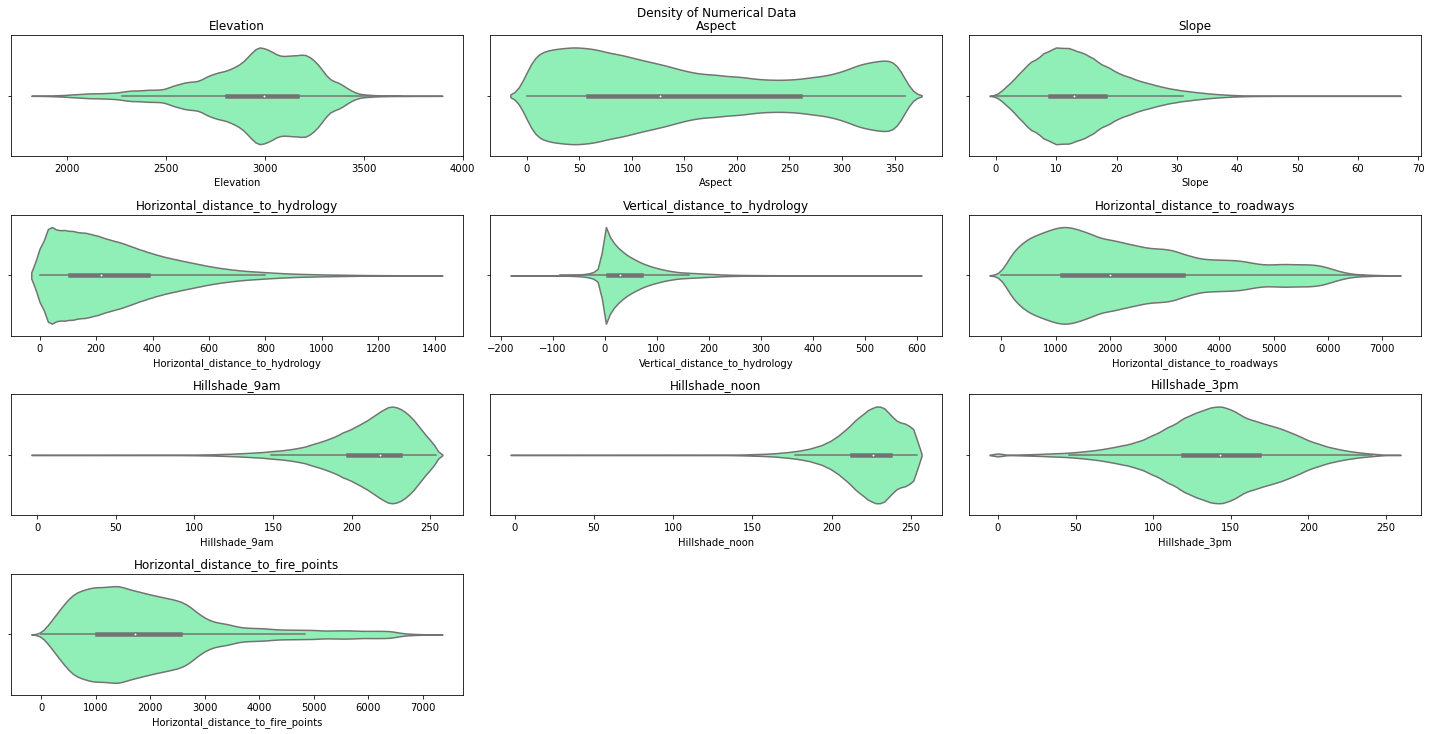

In [7]:
plt.figure(figsize=(20,15))
for i in n:
    plt.subplot(int(len(n)/2)+1,3,i[0]+1)
    sns.violinplot(x=i[1],data=data,palette='rainbow')
    plt.title(i[1])
plt.suptitle('Density of Numerical Data')
plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

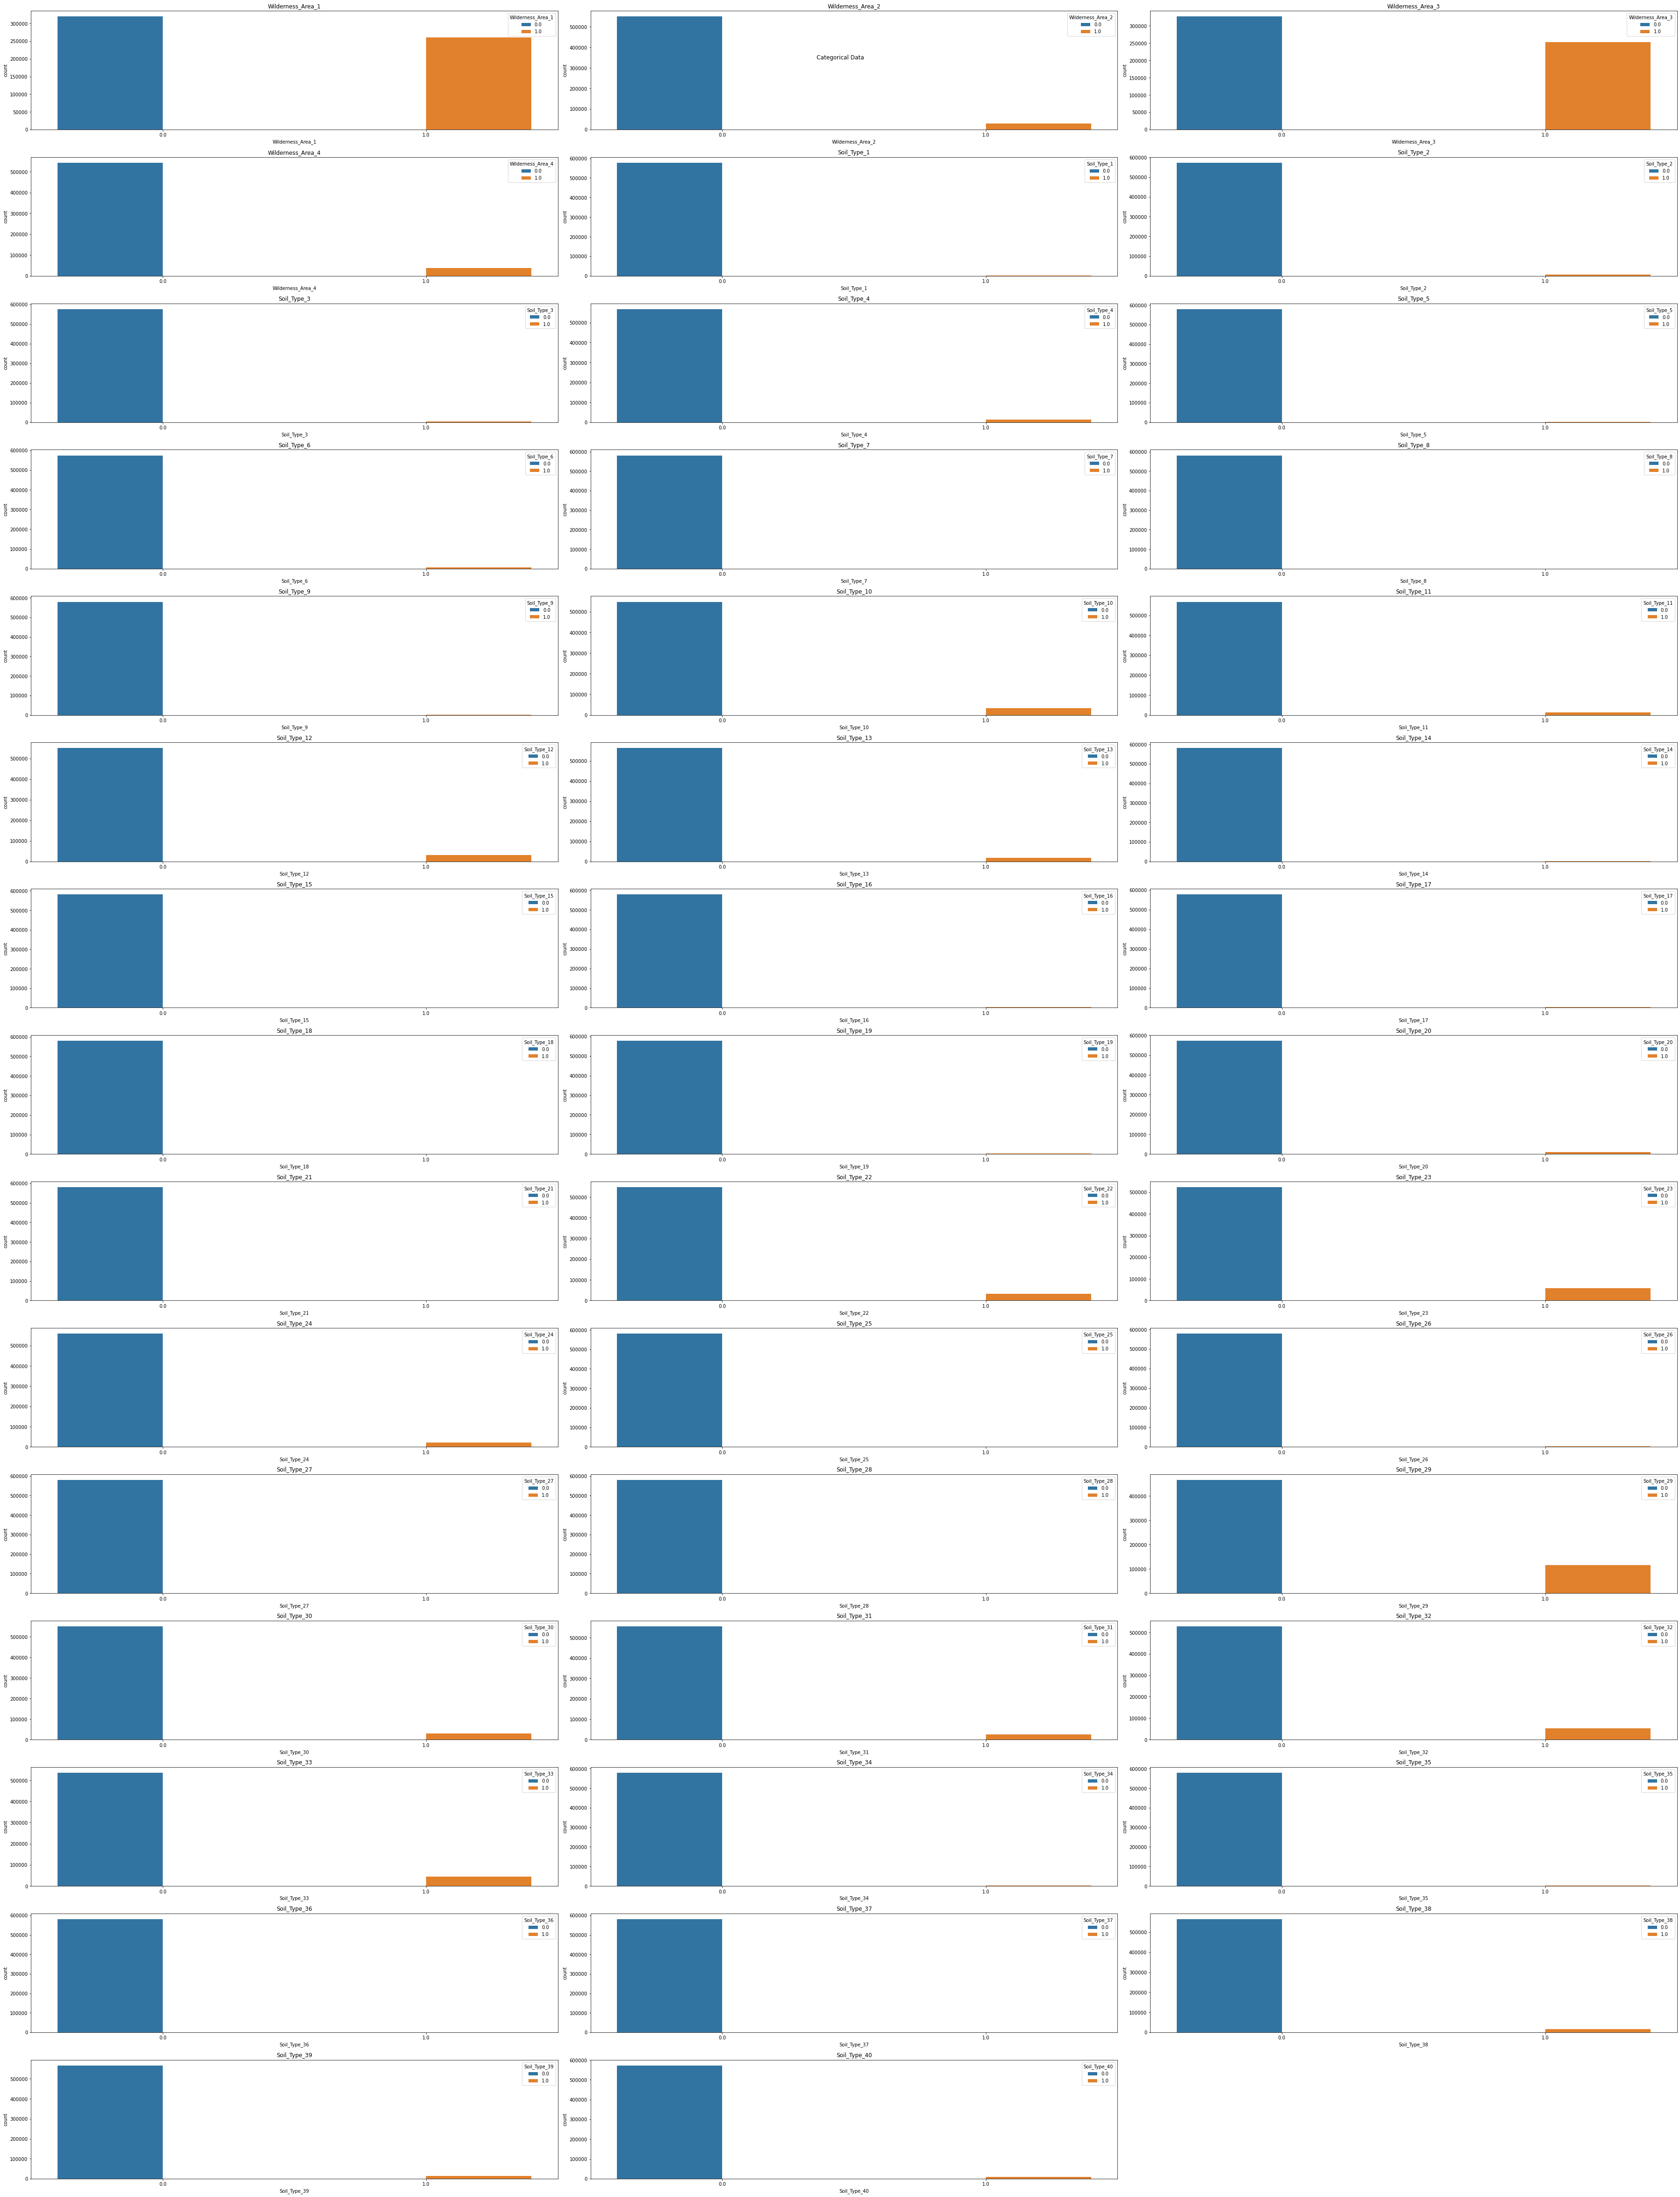

In [8]:
m=list(enumerate(categorical))
plt.figure(figsize=(50,100))
for i in m:
    plt.subplot(int(len(m)/2)+1,3,i[0]+1)
    sns.countplot(i[1],hue=i[1],data=data) 
    plt.title(i[1])
plt.suptitle('Categorical Data')
plt.tight_layout()
plt.show()

In [24]:
# data visualization
# plt.figure(figsize = (20,15))
# sns.heatmap(data.corr())
# plt.show()

##### EX: 1.4

In [10]:
data1=data.copy()
def generate_missing_value_column(row,frac):
    S=data1[row].sample(frac=frac,random_state=1)
    S1=S.index
    NaN = np.nan
    data1[row][S1]=NaN
    #print(S1)
    print('Before replacing with NaN in sample')
    print(S)
    print('Column with NaN values for sample')
    print(data1[row])
    print('The whole DATAFRAME:-')
    return data1

##### EX: 1.5

In [11]:
#A)dataset with 30% missing values in ELEVATION column
generate_missing_value_column(col[0],0.3)

Before replacing with NaN in sample
376969    2949.0
59897     3198.0
247100    2199.0
111532    2851.0
522294    2920.0
           ...  
197988    3466.0
378751    3412.0
282901    2331.0
132396    2921.0
363469    2811.0
Name: Elevation, Length: 174304, dtype: float64
Column with NaN values for sample
0         2596.0
1         2590.0
2         2804.0
3            NaN
4         2595.0
           ...  
581007    2396.0
581008       NaN
581009    2386.0
581010    2384.0
581011    2383.0
Name: Elevation, Length: 581012, dtype: float64
The whole DATAFRAME:-


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire_points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,NaN,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Extracting dependent and Independent variables
Independent_data =data.iloc[:,1:]
Dependent_data = data.iloc[:,:1]
print(Independent_data)
print('\n#########################################################\n')
print(Dependent_data)

        Aspect  Slope  Horizontal_distance_to_hydrology  \
0         51.0    3.0                             258.0   
1         56.0    2.0                             212.0   
2        139.0    9.0                             268.0   
3        155.0   18.0                             242.0   
4         45.0    2.0                             153.0   
...        ...    ...                               ...   
581007   153.0   20.0                              85.0   
581008   152.0   19.0                              67.0   
581009   159.0   17.0                              60.0   
581010   170.0   15.0                              60.0   
581011   165.0   13.0                              60.0   

        Vertical_distance_to_hydrology  Horizontal_distance_to_roadways  \
0                                  0.0                            510.0   
1                                 -6.0                            390.0   
2                                 65.0                           3

In [13]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
Independent_train,Independent_test,Dependent_train,Dependent_test=train_test_split(Independent_data,Dependent_data,test_size=0.30,random_state=2)

##### EX: 1.6

In [14]:
#fitting linear regression into the training set
from sklearn.linear_model import LinearRegression
TheModel = LinearRegression()
TheModel.fit(Independent_train, Dependent_train)

LinearRegression()

In [15]:
#predicting the test set results
ThePrediction = TheModel.predict(Independent_test)
print ('Prediction Value of TEST DEPENDENT:')
prediction=pd.DataFrame(ThePrediction,columns=['Predicted'])
print(ThePrediction)
print ('Score(R square) of the test data is:',TheModel.score(Independent_test,Dependent_test))

Prediction Value of TEST DEPENDENT:
[[3193.14896836]
 [3477.59374557]
 [3080.27174867]
 ...
 [2669.7516253 ]
 [2942.03467843]
 [2367.31397537]]
Score(R square) of the test data is: 0.7826013237000248


##### EX: 1.7

In [16]:
#mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Dependent_test,prediction)
print('Mean squared error of Elevation:',mse)

Mean squared error of Elevation: 17006.238549571182


##### EX: 1.8

In [17]:
#NORMALISATION

#print(data)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()              # define min max scaler
scaled = scaler.fit_transform(data)  # transform data
print(scaled)

[[0.36868434 0.14166667 0.04545455 ... 0.         0.         0.        ]
 [0.36568284 0.15555556 0.03030303 ... 0.         0.         0.        ]
 [0.47273637 0.38611111 0.13636364 ... 0.         0.         0.        ]
 ...
 [0.26363182 0.44166667 0.25757576 ... 0.         0.         0.        ]
 [0.26263132 0.47222222 0.22727273 ... 0.         0.         0.        ]
 [0.26213107 0.45833333 0.1969697  ... 0.         0.         0.        ]]


In [18]:
#Standardization

#print(data)

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()            # define standard scaler
scaled1 = scaler1.fit_transform(data)  # transform data
print(scaled1)

[[-1.29780509 -0.93515698 -1.48281978 ... -0.16595612 -0.15601398
  -0.12365355]
 [-1.31923485 -0.89047967 -1.61636259 ... -0.16595612 -0.15601398
  -0.12365355]
 [-0.5549068  -0.14883628 -0.68156292 ... -0.16595612 -0.15601398
  -0.12365355]
 ...
 [-2.04784663  0.02987297  0.38677957 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05498988  0.12816306  0.11969395 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05856151  0.08348575 -0.14739167 ... -0.16595612 -0.15601398
  -0.12365355]]


##### EX: 1.9

In [19]:
#To find the best feature:-

In [20]:
rsquare=[]
for i in range(1,9):
    Independent_data =pd.DataFrame(data[col[i]])  #Extracting dependent and Independent variables
    Dependent_data = pd.DataFrame(data[col[0]])
    Independent_train,Independent_test,Dependent_train,Dependent_test=train_test_split(Independent_data,Dependent_data,test_size=0.70,random_state=1)    #spliting the dataset into training set and test set
    TheModel1 = LinearRegression()      #fitting linear regression into the training set
    TheModel1.fit(Independent_train, Dependent_train)
    ThePrediction1 = TheModel1.predict(Independent_test)  #predicting the test set results
    SCORE=TheModel1.score(Independent_test,Dependent_test)
    rsquare.append([col[i],SCORE])

In [21]:
#R QUARE VALUE OF ALL THE COLUMNS
rsquare

[['Aspect', 0.00018187126257029895],
 ['Slope', 0.059680906332895245],
 ['Horizontal_distance_to_hydrology', 0.09377756114979996],
 ['Vertical_distance_to_hydrology', 0.008506428149936296],
 ['Horizontal_distance_to_roadways', 0.13392333840118864],
 ['Hillshade_9am', 0.012961258524946784],
 ['Hillshade_noon', 0.042932904965034435],
 ['Hillshade_3pm', 0.0033840967513710796]]

In [22]:
print('The best performing feature:\tHorizontal_distance_to_roadways')

The best performing feature:	Horizontal_distance_to_roadways


In [23]:
# END